In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'mps'

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:04, 23.88it/s]                                                                                                        


Epoch 1 of 100
Generator loss: 1.40891434, Discriminator loss: 0.88323566


118it [00:04, 25.45it/s]                                                                                                        


Epoch 2 of 100
Generator loss: 2.65687767, Discriminator loss: 1.36879570


118it [00:04, 26.03it/s]                                                                                                        


Epoch 3 of 100
Generator loss: 4.11938352, Discriminator loss: 0.41865830


118it [00:04, 25.83it/s]                                                                                                        


Epoch 4 of 100
Generator loss: 1.65726729, Discriminator loss: 1.35196505


118it [00:04, 25.72it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


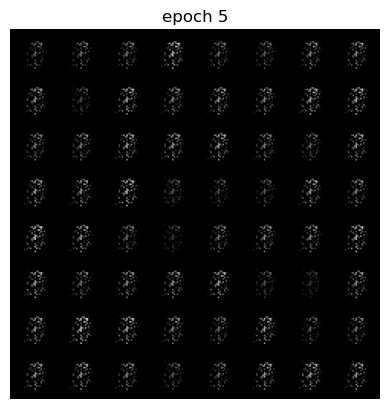

Epoch 5 of 100
Generator loss: 1.22471199, Discriminator loss: 1.22815358


118it [00:04, 25.08it/s]                                                                                                        


Epoch 6 of 100
Generator loss: 2.32487487, Discriminator loss: 1.15135197


118it [00:04, 25.43it/s]                                                                                                        


Epoch 7 of 100
Generator loss: 5.48917054, Discriminator loss: 0.59940587


118it [00:04, 25.88it/s]                                                                                                        


Epoch 8 of 100
Generator loss: 2.56665787, Discriminator loss: 1.24839671


118it [00:04, 25.92it/s]                                                                                                        


Epoch 9 of 100
Generator loss: 3.57656853, Discriminator loss: 1.05186290


118it [00:04, 26.12it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


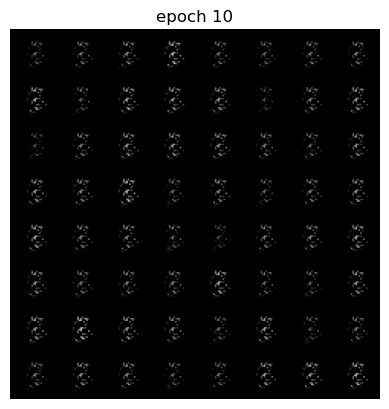

Epoch 10 of 100
Generator loss: 1.69868315, Discriminator loss: 1.02871785


118it [00:04, 25.63it/s]                                                                                                        


Epoch 11 of 100
Generator loss: 2.09150918, Discriminator loss: 0.96904126


118it [00:04, 26.29it/s]                                                                                                        


Epoch 12 of 100
Generator loss: 1.13283701, Discriminator loss: 1.13502592


118it [00:04, 25.93it/s]                                                                                                        


Epoch 13 of 100
Generator loss: 1.77217529, Discriminator loss: 1.05391549


118it [00:04, 26.30it/s]                                                                                                        


Epoch 14 of 100
Generator loss: 1.71999727, Discriminator loss: 0.95794573


118it [00:04, 25.86it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


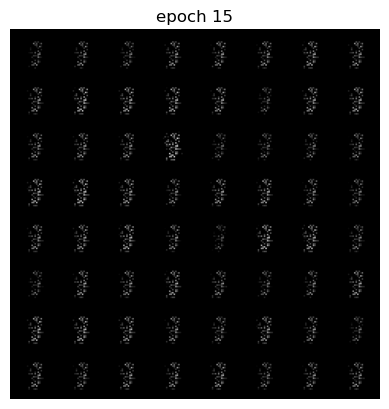

Epoch 15 of 100
Generator loss: 1.57638242, Discriminator loss: 1.10692243


118it [00:04, 25.77it/s]                                                                                                        


Epoch 16 of 100
Generator loss: 2.13448371, Discriminator loss: 0.87806153


118it [00:04, 26.20it/s]                                                                                                        


Epoch 17 of 100
Generator loss: 1.74097286, Discriminator loss: 1.02309648


118it [00:04, 25.69it/s]                                                                                                        


Epoch 18 of 100
Generator loss: 2.14033553, Discriminator loss: 0.73674849


118it [00:04, 26.06it/s]                                                                                                        


Epoch 19 of 100
Generator loss: 2.42239220, Discriminator loss: 0.77205911


118it [00:04, 26.22it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


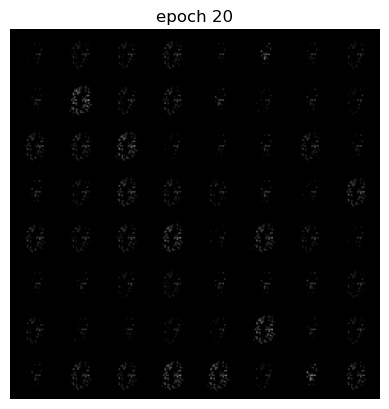

Epoch 20 of 100
Generator loss: 2.42385765, Discriminator loss: 0.63833035


118it [00:04, 26.05it/s]                                                                                                        


Epoch 21 of 100
Generator loss: 2.65626826, Discriminator loss: 0.64381384


118it [00:04, 25.83it/s]                                                                                                        


Epoch 22 of 100
Generator loss: 2.73804091, Discriminator loss: 0.68954151


118it [00:04, 26.00it/s]                                                                                                        


Epoch 23 of 100
Generator loss: 2.86590379, Discriminator loss: 0.44107874


118it [00:04, 25.68it/s]                                                                                                        


Epoch 24 of 100
Generator loss: 2.93454974, Discriminator loss: 0.50798115


118it [00:04, 26.26it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


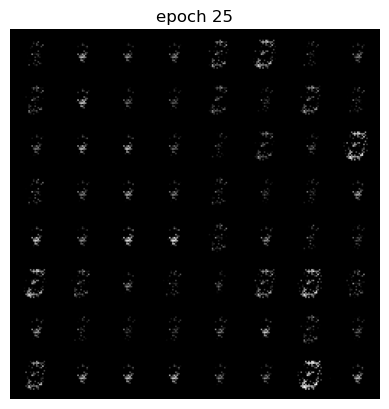

Epoch 25 of 100
Generator loss: 2.66162080, Discriminator loss: 0.61212793


118it [00:04, 25.96it/s]                                                                                                        


Epoch 26 of 100
Generator loss: 2.90412249, Discriminator loss: 0.44174271


118it [00:04, 25.65it/s]                                                                                                        


Epoch 27 of 100
Generator loss: 2.79423060, Discriminator loss: 0.47787444


118it [00:04, 26.07it/s]                                                                                                        


Epoch 28 of 100
Generator loss: 3.48325044, Discriminator loss: 0.39827775


118it [00:04, 26.08it/s]                                                                                                        


Epoch 29 of 100
Generator loss: 3.06731545, Discriminator loss: 0.46948618


118it [00:04, 26.47it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


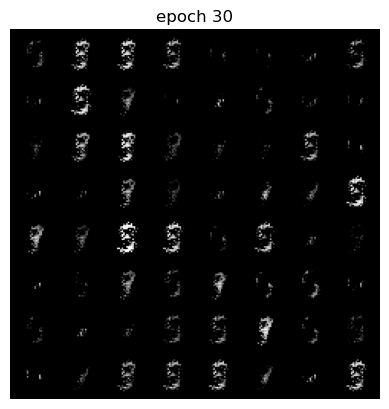

Epoch 30 of 100
Generator loss: 2.96794654, Discriminator loss: 0.45507152


118it [00:04, 25.64it/s]                                                                                                        


Epoch 31 of 100
Generator loss: 2.79729467, Discriminator loss: 0.53720294


118it [00:04, 26.03it/s]                                                                                                        


Epoch 32 of 100
Generator loss: 2.47544691, Discriminator loss: 0.58389753


118it [00:04, 26.32it/s]                                                                                                        


Epoch 33 of 100
Generator loss: 2.67174949, Discriminator loss: 0.54013212


118it [00:04, 26.16it/s]                                                                                                        


Epoch 34 of 100
Generator loss: 2.80302046, Discriminator loss: 0.51205566


118it [00:04, 26.34it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


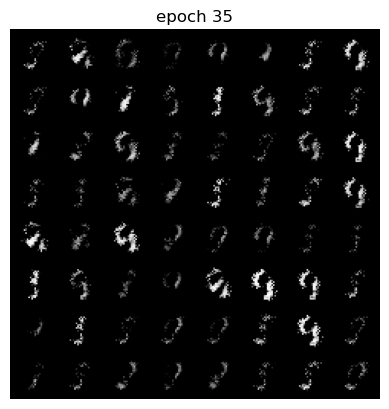

Epoch 35 of 100
Generator loss: 2.71041100, Discriminator loss: 0.52185356


118it [00:04, 26.06it/s]                                                                                                        


Epoch 36 of 100
Generator loss: 2.50389294, Discriminator loss: 0.58562040


118it [00:04, 26.45it/s]                                                                                                        


Epoch 37 of 100
Generator loss: 2.79900734, Discriminator loss: 0.55126016


118it [00:04, 26.10it/s]                                                                                                        


Epoch 38 of 100
Generator loss: 3.07555765, Discriminator loss: 0.51983243


118it [00:04, 26.66it/s]                                                                                                        


Epoch 39 of 100
Generator loss: 2.47373141, Discriminator loss: 0.51963178


118it [00:04, 26.51it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


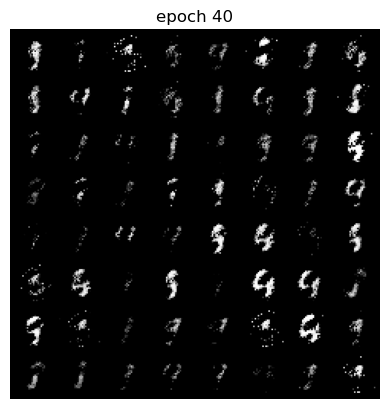

Epoch 40 of 100
Generator loss: 2.92051016, Discriminator loss: 0.45907617


118it [00:04, 26.75it/s]                                                                                                        


Epoch 41 of 100
Generator loss: 2.49865472, Discriminator loss: 0.62944756


118it [00:04, 23.63it/s]                                                                                                        


Epoch 42 of 100
Generator loss: 2.70873028, Discriminator loss: 0.57245782


118it [00:04, 26.09it/s]                                                                                                        


Epoch 43 of 100
Generator loss: 2.89052184, Discriminator loss: 0.52314040


118it [00:04, 26.80it/s]                                                                                                        


Epoch 44 of 100
Generator loss: 2.66279368, Discriminator loss: 0.53496583


118it [00:04, 26.63it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


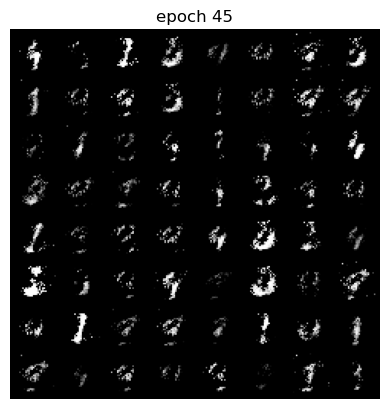

Epoch 45 of 100
Generator loss: 2.61773495, Discriminator loss: 0.52791528


118it [00:04, 26.83it/s]                                                                                                        


Epoch 46 of 100
Generator loss: 2.57672926, Discriminator loss: 0.59736465


118it [00:04, 25.68it/s]                                                                                                        


Epoch 47 of 100
Generator loss: 2.79386840, Discriminator loss: 0.56356751


118it [00:04, 25.79it/s]                                                                                                        


Epoch 48 of 100
Generator loss: 2.92944525, Discriminator loss: 0.55619468


118it [00:04, 26.28it/s]                                                                                                        


Epoch 49 of 100
Generator loss: 2.99792489, Discriminator loss: 0.57317471


118it [00:04, 27.15it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


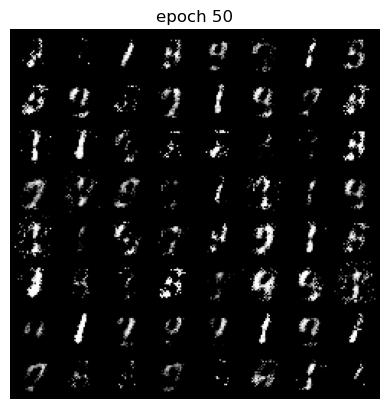

Epoch 50 of 100
Generator loss: 2.74799489, Discriminator loss: 0.52717088


118it [00:04, 26.81it/s]                                                                                                        


Epoch 51 of 100
Generator loss: 2.73238966, Discriminator loss: 0.54611088


118it [00:04, 27.14it/s]                                                                                                        


Epoch 52 of 100
Generator loss: 3.00709407, Discriminator loss: 0.51178058


118it [00:04, 24.25it/s]                                                                                                        


Epoch 53 of 100
Generator loss: 2.64024226, Discriminator loss: 0.61284838


118it [00:04, 26.41it/s]                                                                                                        


Epoch 54 of 100
Generator loss: 2.66556568, Discriminator loss: 0.58041525


118it [00:04, 25.19it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


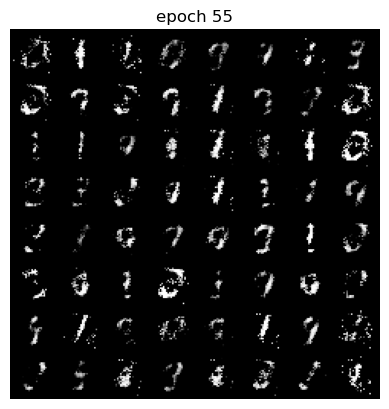

Epoch 55 of 100
Generator loss: 2.31995719, Discriminator loss: 0.67310581


118it [00:04, 26.47it/s]                                                                                                        


Epoch 56 of 100
Generator loss: 2.24414748, Discriminator loss: 0.67085222


118it [00:04, 25.85it/s]                                                                                                        


Epoch 57 of 100
Generator loss: 2.42146262, Discriminator loss: 0.65752968


118it [00:04, 26.88it/s]                                                                                                        


Epoch 58 of 100
Generator loss: 2.31998313, Discriminator loss: 0.70915124


118it [00:04, 26.57it/s]                                                                                                        


Epoch 59 of 100
Generator loss: 2.20799146, Discriminator loss: 0.72961725


118it [00:04, 26.26it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


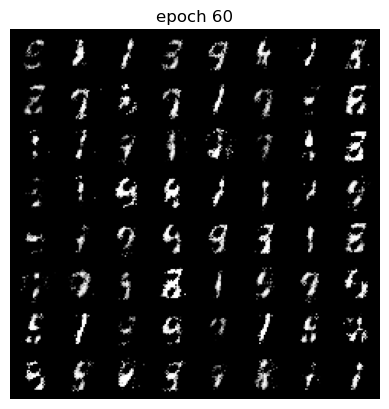

Epoch 60 of 100
Generator loss: 2.28055968, Discriminator loss: 0.66416603


118it [00:04, 26.46it/s]                                                                                                        


Epoch 61 of 100
Generator loss: 2.37640455, Discriminator loss: 0.62124355


118it [00:04, 26.10it/s]                                                                                                        


Epoch 62 of 100
Generator loss: 2.37523449, Discriminator loss: 0.69583609


118it [00:04, 26.79it/s]                                                                                                        


Epoch 63 of 100
Generator loss: 2.32566613, Discriminator loss: 0.68996986


118it [00:04, 25.05it/s]                                                                                                        


Epoch 64 of 100
Generator loss: 2.23025399, Discriminator loss: 0.71769015


118it [00:04, 25.79it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


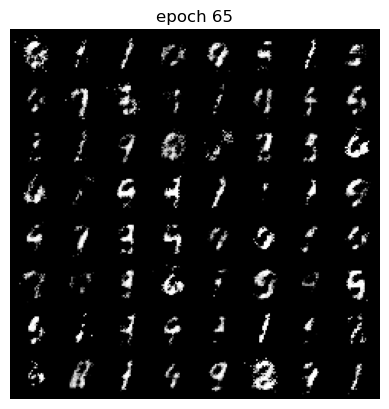

Epoch 65 of 100
Generator loss: 2.18361967, Discriminator loss: 0.68837674


118it [00:04, 26.84it/s]                                                                                                        


Epoch 66 of 100
Generator loss: 2.27640932, Discriminator loss: 0.66987050


118it [00:04, 26.97it/s]                                                                                                        


Epoch 67 of 100
Generator loss: 1.96361886, Discriminator loss: 0.75011559


118it [00:04, 26.77it/s]                                                                                                        


Epoch 68 of 100
Generator loss: 2.11002859, Discriminator loss: 0.69702402


118it [00:04, 26.66it/s]                                                                                                        


Epoch 69 of 100
Generator loss: 2.17194036, Discriminator loss: 0.73927751


118it [00:04, 26.23it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


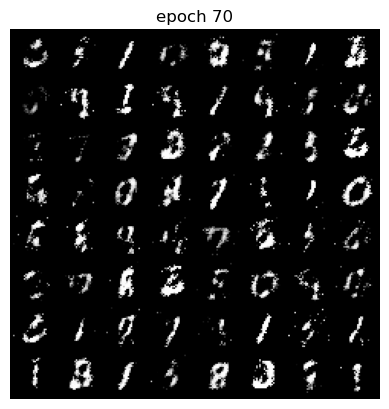

Epoch 70 of 100
Generator loss: 2.12908069, Discriminator loss: 0.68641656


118it [00:04, 25.71it/s]                                                                                                        


Epoch 71 of 100
Generator loss: 2.08620792, Discriminator loss: 0.71455315


118it [00:04, 26.59it/s]                                                                                                        


Epoch 72 of 100
Generator loss: 2.12181834, Discriminator loss: 0.74368879


118it [00:04, 26.50it/s]                                                                                                        


Epoch 73 of 100
Generator loss: 2.11551165, Discriminator loss: 0.74083670


118it [00:04, 25.11it/s]                                                                                                        


Epoch 74 of 100
Generator loss: 1.99254190, Discriminator loss: 0.76221607


118it [00:04, 24.84it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


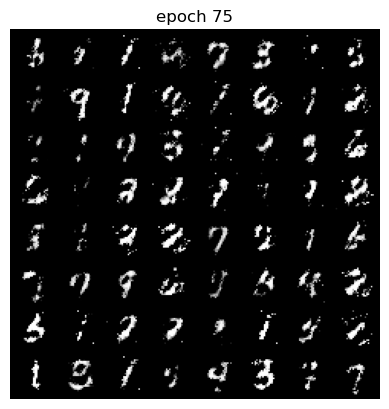

Epoch 75 of 100
Generator loss: 1.94384102, Discriminator loss: 0.76581520


118it [00:04, 25.58it/s]                                                                                                        


Epoch 76 of 100
Generator loss: 2.12951965, Discriminator loss: 0.69809914


118it [00:04, 26.67it/s]                                                                                                        


Epoch 77 of 100
Generator loss: 2.02578888, Discriminator loss: 0.75124144


118it [00:04, 27.07it/s]                                                                                                        


Epoch 78 of 100
Generator loss: 2.21342897, Discriminator loss: 0.70914156


118it [00:04, 27.14it/s]                                                                                                        


Epoch 79 of 100
Generator loss: 2.25664156, Discriminator loss: 0.71153911


118it [00:04, 26.83it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


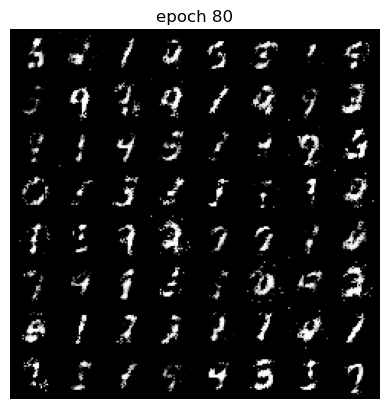

Epoch 80 of 100
Generator loss: 1.92476870, Discriminator loss: 0.80959348


118it [00:04, 26.61it/s]                                                                                                        


Epoch 81 of 100
Generator loss: 1.77474585, Discriminator loss: 0.85057939


118it [00:04, 26.65it/s]                                                                                                        


Epoch 82 of 100
Generator loss: 1.91126911, Discriminator loss: 0.82746824


118it [00:04, 25.17it/s]                                                                                                        


Epoch 83 of 100
Generator loss: 2.10498063, Discriminator loss: 0.73607890


118it [00:04, 25.66it/s]                                                                                                        


Epoch 84 of 100
Generator loss: 1.91903152, Discriminator loss: 0.83493843


118it [00:04, 26.68it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


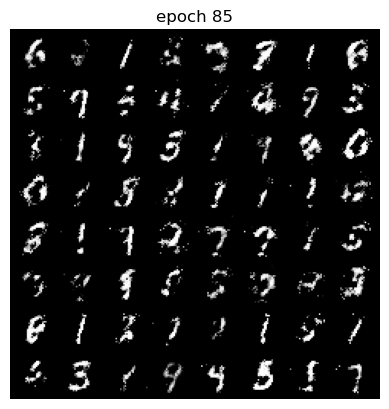

Epoch 85 of 100
Generator loss: 1.77404822, Discriminator loss: 0.83619070


118it [00:04, 25.88it/s]                                                                                                        


Epoch 86 of 100
Generator loss: 1.81721081, Discriminator loss: 0.83122966


118it [00:04, 23.83it/s]                                                                                                        


Epoch 87 of 100
Generator loss: 1.87527708, Discriminator loss: 0.81009422


118it [00:04, 25.19it/s]                                                                                                        


Epoch 88 of 100
Generator loss: 1.90146134, Discriminator loss: 0.80917780


118it [00:04, 26.41it/s]                                                                                                        


Epoch 89 of 100
Generator loss: 1.95650742, Discriminator loss: 0.77030041


118it [00:04, 26.72it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


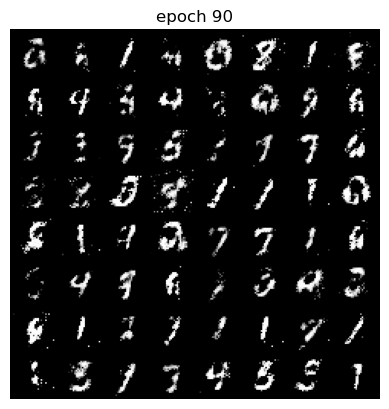

Epoch 90 of 100
Generator loss: 1.99473392, Discriminator loss: 0.80932698


118it [00:04, 26.49it/s]                                                                                                        


Epoch 91 of 100
Generator loss: 1.92448722, Discriminator loss: 0.81818889


118it [00:04, 26.14it/s]                                                                                                        


Epoch 92 of 100
Generator loss: 1.83886775, Discriminator loss: 0.83023560


118it [00:04, 25.97it/s]                                                                                                        


Epoch 93 of 100
Generator loss: 1.86248922, Discriminator loss: 0.81238328


118it [00:04, 26.28it/s]                                                                                                        


Epoch 94 of 100
Generator loss: 1.88838870, Discriminator loss: 0.81755429


118it [00:04, 25.82it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


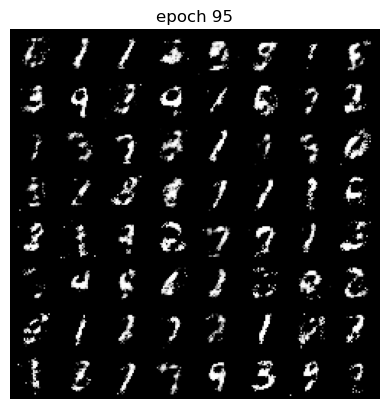

Epoch 95 of 100
Generator loss: 1.94572054, Discriminator loss: 0.78116903


118it [00:04, 25.78it/s]                                                                                                        


Epoch 96 of 100
Generator loss: 1.87642806, Discriminator loss: 0.80459463


118it [00:04, 25.47it/s]                                                                                                        


Epoch 97 of 100
Generator loss: 1.88606978, Discriminator loss: 0.78956851


118it [00:04, 26.58it/s]                                                                                                        


Epoch 98 of 100
Generator loss: 1.90763455, Discriminator loss: 0.80100478


118it [00:04, 26.41it/s]                                                                                                        


Epoch 99 of 100
Generator loss: 1.89995283, Discriminator loss: 0.80601516


118it [00:04, 26.63it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


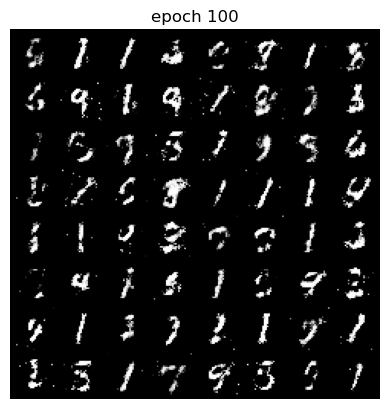

Epoch 100 of 100
Generator loss: 1.79941247, Discriminator loss: 0.84033419


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return (criterion(output[true_label == 1], true_label[true_label == 1])
            + criterion(output[true_label == 0], true_label[true_label == 0]))
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        X, _ = data
        X = X.to(device)
        
        # Optimize Discriminator
        for _ in range(k):
            # Forward Pass
            # Output
            inputs = torch.cat((X, generator(create_noise(sample_size, nz))))
            output = discriminator(inputs)
            labels = torch.cat((label_real(X.shape[0]), label_fake(sample_size)))
            
            # Loss
            d_loss = discriminator_loss(output, labels)
            
            # Backward pass
            optim_d.zero_grad()
            d_loss.backward()
            optim_d.step()
            
        # Optimize Generator
        # Forward Pass
        output = discriminator(generator(create_noise(sample_size, nz)))
        labels = label_real(sample_size)
        
        # Loss
        g_loss = generator_loss(output, labels)
        
        # Backward Pass
        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()
        
        # Accumulate losses
        loss_g += g_loss.item()
        # Do not accumulate losses inside the for-k loop
        loss_d += d_loss.item() # Last iteration loss
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

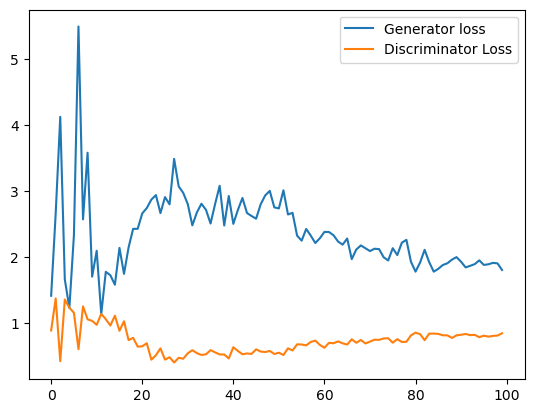

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')